In [2]:
import torch
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Optimizer
import torch.nn as nn
import torch.nn.functional as F
from useful_functions import *
from optimizer import *
from model import *
from MNIST_data_process import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from training import *

In [11]:
n=4
d=784
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A=get_xinmeng_matrix(n=n).T 
A=0.9*A+0.1*I
B=get_B(A=A,u=2*n,n=n)
show_row(A)
show_col(B)
epochs=200

A的第二大特征值: 1.0
A的beta: 0.7419820516198068
A的spectral gap: 0.2580179483801932
A的kappa: 4.000000000000008
S_A是: 36.99423820863273 

B的第二大特征值: 0.4904602443299633
B的beta: 0.7493420437665903
B的spectral gap: 0.2506579562334097
B的kappa: 4.007048801393863
S_B是: 38.10858504553145 



Training Progress: 100%|██████████| 200/200 [00:19<00:00, 10.08it/s, accuracy=97.4674384949%, epoch=200, loss=0.0779157411]


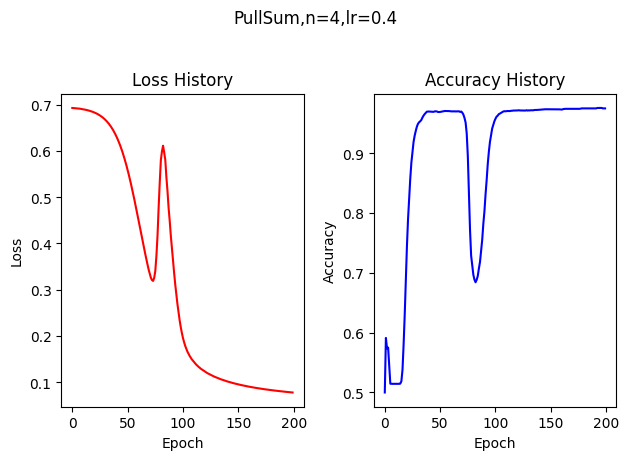

In [16]:
l1,a1=train_PullSum(n=n,d=d,A=A,B=B,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.4/n)) 

Training Progress: 100%|██████████| 200/200 [00:16<00:00, 12.41it/s, accuracy=97.3950795948%, epoch=200, loss=0.0932986625]


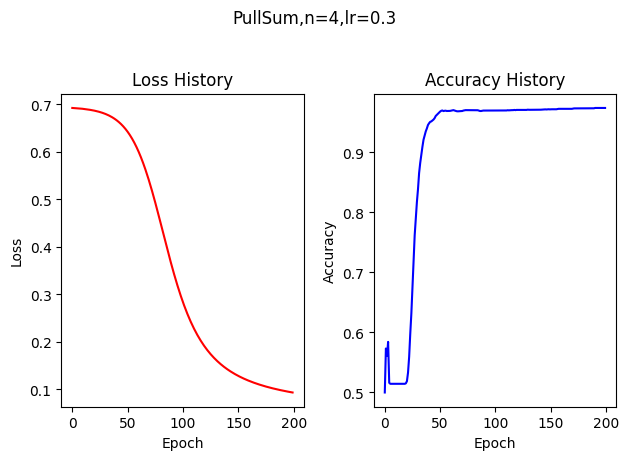

In [17]:
l2,a2=train_PullSum(n=n,d=d,A=A,B=B,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.3/n)) 

Training Progress: 100%|██████████| 200/200 [00:19<00:00, 10.10it/s, accuracy=97.4674384949%, epoch=200, loss=0.0782861486]


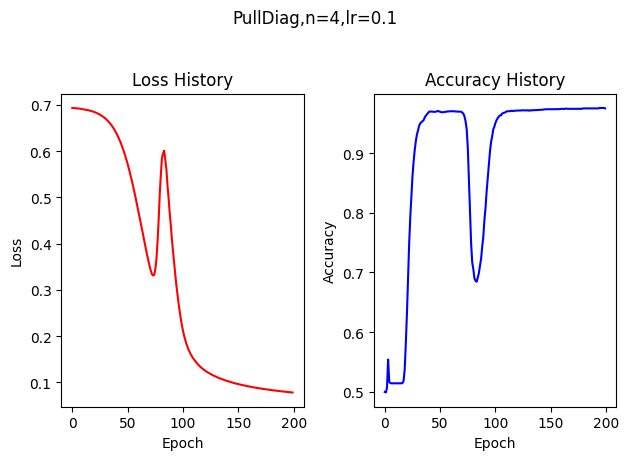

In [22]:
L1,A1=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=0.1) 

Training Progress:   0%|          | 0/200 [00:00<?, ?it/s, accuracy=50.0000000000%, epoch=1, loss=0.6930222809]

Training Progress: 100%|██████████| 200/200 [00:15<00:00, 12.52it/s, accuracy=97.3950795948%, epoch=200, loss=0.0939443000]


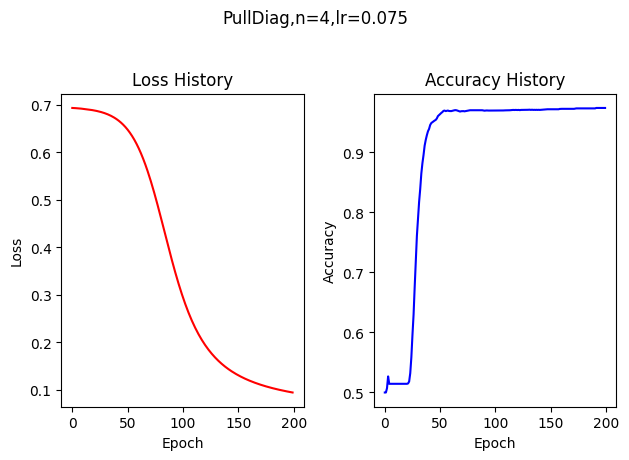

In [23]:
L2,A2=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.3/4))

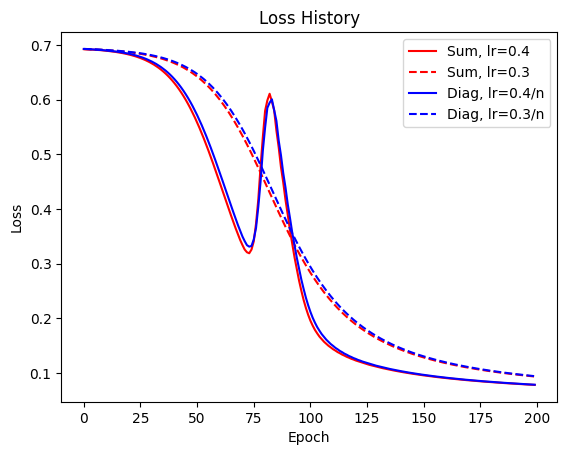

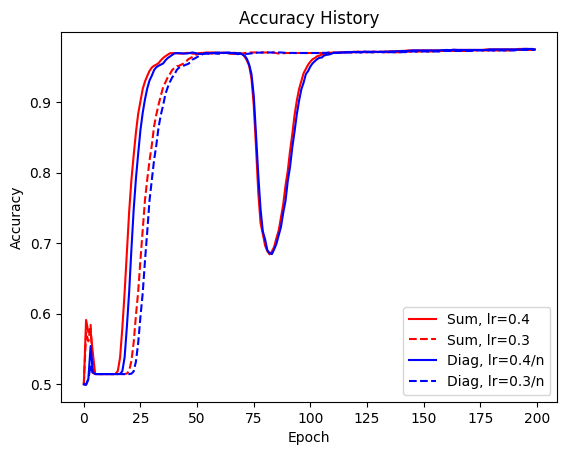

In [26]:
plt.plot(l1,color='r',linestyle='-',label='Sum, lr=0.4')
plt.plot(l2,color='r',linestyle='--',label='Sum, lr=0.3')
plt.plot(L1,color='b',linestyle='-',label='Diag, lr=0.4/n')
plt.plot(L2,color='b',linestyle='--',label='Diag, lr=0.3/n')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend() 
plt.show()

plt.plot(a1,color='r',linestyle='-',label='Sum, lr=0.4')
plt.plot(a2,color='r',linestyle='--',label='Sum, lr=0.3')
plt.plot(A1,color='b',linestyle='-',label='Diag, lr=0.4/n')
plt.plot(A2,color='b',linestyle='--',label='Diag, lr=0.3/n')
plt.title('Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend() 
plt.show()